# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></div><div class="lev1 toc-item"><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></div><div class="lev1 toc-item"><a href="#Plot-the-gsq-vs-gmdsq" data-toc-modified-id="Plot-the-gsq-vs-gmdsq-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plot the gsq vs gmdsq</a></div><div class="lev1 toc-item"><a href="#Results" data-toc-modified-id="Results-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Results</a></div><div class="lev1 toc-item"><a href="#Script" data-toc-modified-id="Script-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Script</a></div>

# Introduction
Date: Nov 14, 2019

**Update**
1. Added two new columns to imcat output catalog
```bash
lc -b +all 
'x = %x[0][0] %x[1][0] + %x[2][0] + %x[3][0] + 4 / %x[0][1] %x[1][1] + %x[2][1] + %x[3][1] + 4 / 2 vector'
'gm = %g[0][0] %g[1][0] + 2 / %g[0][1] %g[1][1] + 2 / 2 vector' 
'gc = %g[2][0] %g[3][0] + 2 / %g[2][1] %g[3][1] + 2 / 2 vector'   
'gmd = %g[0][0] %g[1][0] - 2 / %g[0][1] %g[1][1] - 2 / 2 vector' 
'gcd = %g[2][0] %g[3][0] - 2 / %g[2][1] %g[3][1] - 2 / 2 vector' 
< ${catalogs}/merge.cat > ${final}/final_${i}.cat
```





**Notes**

final_text.txt is created by imcat program after merging four lsst files (m,m9,l,l9)
after cleaning.

**Usual Filtering**

```python
column ==> deblend_nChild == 0.0
ellipticity ==> ellip < 1.5
nans ==> if nans in cols_select, remove row

where,
cols_select = ['base_SdssCentroid_x', 'base_SdssCentroid_y',
       'base_SdssCentroid_xSigma','base_SdssCentroid_ySigma',
       'ext_shapeHSM_HsmShapeRegauss_e1','ext_shapeHSM_HsmShapeRegauss_e2',
        'base_SdssShape_flux']
```


# Imports

In [6]:
import json, os,sys
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

pd.set_option('display.max_columns',200)

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Plot the gsq vs gmdsq

```
gsq = g00 g00 + g10 g10
gmdsq = gmd0**2 + gmd1**2

```

In [1]:
!head -2 final/final_text.txt

#       fN[0][0]       fN[1][0]       fN[2][0]       fN[3][0]       id[0][0]       id[1][0]       id[2][0]       id[3][0]           x[0]           x[1]     errx[0][0]     errx[0][1]     errx[1][0]     errx[1][1]     errx[2][0]     errx[2][1]     errx[3][0]     errx[3][1]        g[0][0]        g[0][1]        g[1][0]        g[1][1]        g[2][0]        g[2][1]        g[3][0]        g[3][1]    ellip[0][0]    ellip[1][0]    ellip[2][0]    ellip[3][0]     flux[0][0]     flux[1][0]     flux[2][0]     flux[3][0]   radius[0][0]   radius[1][0]   radius[2][0]   radius[3][0]          gm[0]          gm[1]          gc[0]          gc[1]         gmd[0]         gmd[1]         gcd[0]         gcd[1]
               0              0              0              0           5678           5735           5568           5678      1969.2159      2159.7569         0.1046         0.0759         0.1063         0.0745         0.1055         0.0759          0.107         0.0746          1.083        -0.2341       

In [3]:
names = "fN[0][0]       fN[1][0]       fN[2][0]       fN[3][0]       id[0][0]       id[1][0]       id[2][0]       id[3][0]           x[0]           x[1]     errx[0][0]     errx[0][1]     errx[1][0]     errx[1][1]     errx[2][0]     errx[2][1]     errx[3][0]     errx[3][1]        g[0][0]        g[0][1]        g[1][0]        g[1][1]        g[2][0]        g[2][1]        g[3][0]        g[3][1]    ellip[0][0]    ellip[1][0]    ellip[2][0]    ellip[3][0]     flux[0][0]     flux[1][0]     flux[2][0]     flux[3][0]   radius[0][0]   radius[1][0]   radius[2][0]   radius[3][0]          gm[0]          gm[1]          gc[0]          gc[1]         gmd[0]         gmd[1]         gcd[0]         gcd[1]".split()
print(names)

['fN[0][0]', 'fN[1][0]', 'fN[2][0]', 'fN[3][0]', 'id[0][0]', 'id[1][0]', 'id[2][0]', 'id[3][0]', 'x[0]', 'x[1]', 'errx[0][0]', 'errx[0][1]', 'errx[1][0]', 'errx[1][1]', 'errx[2][0]', 'errx[2][1]', 'errx[3][0]', 'errx[3][1]', 'g[0][0]', 'g[0][1]', 'g[1][0]', 'g[1][1]', 'g[2][0]', 'g[2][1]', 'g[3][0]', 'g[3][1]', 'ellip[0][0]', 'ellip[1][0]', 'ellip[2][0]', 'ellip[3][0]', 'flux[0][0]', 'flux[1][0]', 'flux[2][0]', 'flux[3][0]', 'radius[0][0]', 'radius[1][0]', 'radius[2][0]', 'radius[3][0]', 'gm[0]', 'gm[1]', 'gc[0]', 'gc[1]', 'gmd[0]', 'gmd[1]', 'gcd[0]', 'gcd[1]']


In [9]:
names = ['fN[0][0]', 'fN[1][0]', 'fN[2][0]', 'fN[3][0]', 
         'id[0][0]', 'id[1][0]', 'id[2][0]', 'id[3][0]',
         'x[0]', 'x[1]', 'errx[0][0]', 'errx[0][1]', 'errx[1][0]',
         'errx[1][1]', 'errx[2][0]', 'errx[2][1]', 'errx[3][0]',
         'errx[3][1]', 'g[0][0]', 'g[0][1]', 'g[1][0]', 'g[1][1]',
         'g[2][0]', 'g[2][1]', 'g[3][0]', 'g[3][1]',
         'ellip[0][0]', 'ellip[1][0]', 'ellip[2][0]', 'ellip[3][0]',
         'flux[0][0]', 'flux[1][0]', 'flux[2][0]', 'flux[3][0]',
         'radius[0][0]', 'radius[1][0]', 'radius[2][0]', 'radius[3][0]',
         'gm[0]', 'gm[1]', 'gc[0]', 'gc[1]',
         'gmd[0]', 'gmd[1]', 'gcd[0]', 'gcd[1]']


file_path = f'final/final_text.txt'


df = pd.read_csv(file_path,comment='#',engine='python',sep=r'\s\s+',
                 header=None,names=names)

print(df.shape)
df.head()



(183832, 46)


,fN[0][0],fN[1][0],fN[2][0],fN[3][0],id[0][0],id[1][0],id[2][0],id[3][0],x[0],x[1],errx[0][0],errx[0][1],errx[1][0],errx[1][1],errx[2][0],errx[2][1],errx[3][0],errx[3][1],g[0][0],g[0][1],g[1][0],g[1][1],g[2][0],g[2][1],g[3][0],g[3][1],ellip[0][0],ellip[1][0],ellip[2][0],ellip[3][0],flux[0][0],flux[1][0],flux[2][0],flux[3][0],radius[0][0],radius[1][0],radius[2][0],radius[3][0],gm[0],gm[1],gc[0],gc[1],gmd[0],gmd[1],gcd[0],gcd[1]
0,0,0,0,0,5678,5735,5568,5678,1969.21590,2159.75690,0.1046,0.0759,0.1063,0.0745,0.1055,0.0759,0.1070,0.0746,1.0830,-0.2341,1.1499,-0.4244,1.1705,-0.2617,1.2105,-0.4458,1.108013,1.225718,1.199399,1.289980,8119.9753,8214.5911,8109.6423,8206.3494,3.990534,4.020170,3.987262,4.020873,1.11645,-0.32925,1.19050,-0.35375,-0.03345,0.09515,-0.02000,0.09205
1,0,0,0,0,3181,3193,3164,3179,2222.70820,480.46175,0.0084,0.0080,0.0078,0.0086,0.0083,0.0080,0.0078,0.0086,0.4174,0.6428,-0.2249,-0.5265,0.4378,0.6521,-0.2665,-0.5215,0.766430,0.572523,0.785432,0.585649,53940.3420,53844.2740,53930.3800,53825.1630,3.824574,3.820401,3.820253,3.815395,0.09625,0.05815,0.08565,0.06530,0.32115,0.58465,0.35215,0.58680
2,0,0,0,0,617,629,634,631,2490.22380,808.50175,0.1954,0.2183,0.1988,0.2101,0.1967,0.2164,0.1999,0.2103,-0.5360,-0.2100,-0.0658,-0.7159,-0.6352,-0.1759,-0.0540,-0.5692,0.575670,0.718918,0.659105,0.571756,1992.9584,2009.3786,1981.6793,2005.1267,3.643384,3.651113,3.555529,3.603011,-0.30090,-0.46295,-0.34460,-0.37255,-0.23510,0.25295,-0.29060,0.19665
3,0,0,0,0,684,696,699,698,3373.27020,905.54893,0.0547,0.0594,0.0549,0.0592,0.0547,0.0594,0.0550,0.0591,-0.6025,-0.0211,0.2921,-0.1267,-0.6900,-0.0190,0.3317,-0.3053,0.602869,0.318395,0.690262,0.450814,6554.3191,6547.4142,6556.4337,6549.9094,3.529530,3.531219,3.530856,3.532656,-0.15520,-0.07390,-0.17915,-0.16215,-0.44730,0.05280,-0.51085,0.14315
4,0,0,0,0,7439,7449,7225,7379,469.49428,3091.40550,0.1649,0.1191,0.1122,0.1652,0.1660,0.1190,0.1129,0.1656,0.8693,-0.5821,-0.8425,0.6476,0.8742,-0.5830,-0.8725,0.6541,1.046194,1.062634,1.050769,1.090460,5283.5760,5059.5502,5279.9345,5064.7001,4.001462,3.860184,4.002095,3.864219,0.01340,0.03275,0.00085,0.03555,0.85590,-0.61485,0.87335,-0.61855


In [11]:
# new columns
df['gsq'] = df['g[0][0]'] **2 + df['g[1][0]']**2
df['gmdsq'] = df['gmd[0]'] **2 + df['gmd[1]']**2

FileNotFoundError: [Errno 2] No such file or directory: 'images/gsq_vs_gmdsq.png'

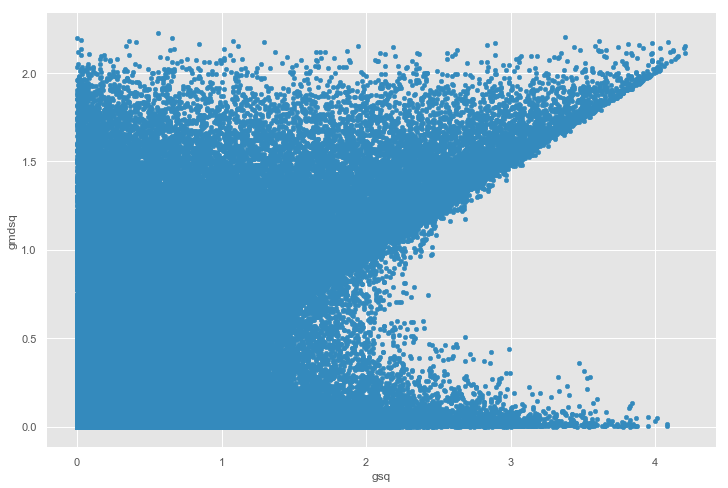

In [13]:

df.plot.scatter(x='gsq',y='gmdsq', figsize=(12,8))
plt.savefig('images/gsq_vs_gmdsq.png')